# CH5440- Test1                       
### -Himasree MM17B113

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# OLS

In [2]:
'''
Defining Ordinary least squares 
y=ax+b
from formulae, a= Syu/Suu and b=y_mean-a(x_mean)
'''
def getOLS(data,fea1, fea2):
    #x,y
    # calculating b

    x_mean=np.mean(data[fea1])
    y_mean=np.mean(data[fea2])

    # calculating numerator and denominator for a

    Syu= np.multiply(np.subtract(data[fea2],y_mean),np.subtract(data[fea1],x_mean))
    Syu=np.sum(Syu)/len(data)
    numerator=Syu

    Suu= np.multiply(np.subtract(data[fea1],x_mean),np.subtract(data[fea1],x_mean))
    Suu=np.sum(Suu)/len(data)
    denominator=Suu
    print('Syu:',Syu,'Suu:',Suu)
    a_OLS=numerator/denominator

    b_OLS=y_mean-a_OLS*x_mean

    print('Slope Parameter of OLS:',a_OLS)
    print('Offset Parameter of OLS:',b_OLS)
#     print(Syu,Suu,x_mean,y_mean)
    return a_OLS,b_OLS

# TLS

In [3]:
'''
Defining Total least squares 
from formulae, a= ((Syy-Suu)+sqrt((Syy-Suu)^2+4*(Syu)^2))/2*Syu and
b=y_mean-a(x_mean)
'''
def getTLS(data,fea1,fea2):
    
    # calculating b

    x_mean=np.mean(data[fea1])
    y_mean=np.mean(data[fea2])

    # calculating numerator and denominator for a

    Syu= np.multiply(np.subtract(data[fea2],y_mean),np.subtract(data[fea1],x_mean))
    Syu=np.sum(Syu)/len(data)

    Suu= np.multiply(np.subtract(data[fea1],x_mean),np.subtract(data[fea1],x_mean))
    Suu=np.sum(Suu)/len(data)

    Syy=np.multiply(np.subtract(data[fea2],y_mean),np.subtract(data[fea2],y_mean))
    Syy=np.sum(Syy)/len(data)

    numerator=(Syy-Suu)+sqrt((Syy-Suu)**2+4*((Syu)**2))
    denominator=2*Syu
    print('Syu',Syu,'Suu',Suu,'Syy',Syy)
    a_TLS=numerator/denominator

    b_TLS=y_mean-a_TLS*x_mean

    print('Slope Parameter of TLS:',a_TLS)
    print('Offset Parameter of TLS:',b_TLS)
#     print(Syu,Suu,Syy,x_mean,y_mean)
    return a_TLS,b_TLS

# Question 1

In [92]:
# Data

data= pd.read_excel('MM17B113Data.xlsx')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Life Exp        29 non-null     float64
 1   Avg Per Capita  29 non-null     float64
dtypes: float64(2)
memory usage: 592.0 bytes


## Data Visualization

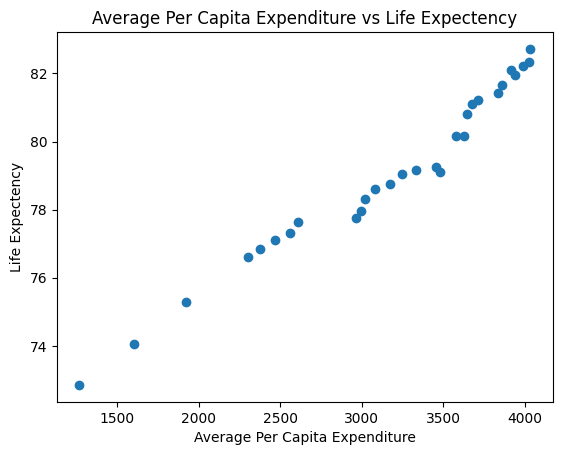

In [14]:
plt.scatter(data['Avg Per Capita'],data['Life Exp'])
plt.ylabel('Life Expectency')
plt.xlabel('Average Per Capita Expenditure')
plt.title('Average Per Capita Expenditure vs Life Expectency')
plt.show()

#### Linear trend is observed between Average Per Capita Expenditure and Life Expectency

# Data Preprocessing
### The offset parameter is assumed to be non zero, therefore we need to mean shift the data

In [84]:
# mean shifting of data for desired columns

def meanshift(data,cols):
    new_data=data
    for fea in cols:
        fea_mean=np.mean(data[fea])
        new_data[fea]=np.subtract(data[fea],fea_mean)
    return new_data

In [90]:
# data_ms=meanshift(data,data.columns)

# part (a)

In [93]:
# sample mean of life expectency

print('sample mean of life expectency is', data['Life Exp'].mean(),'years.')

# Average per capita expenditure

print('Average per capita expenditure is', data['Avg Per Capita'].mean(),'USD.')

# print('------after mean shifting------')

# print('sample mean of life expectency is', data_ms['Life Exp'].mean(),'years.')

# # Average per capita expenditure

# print('Average per capita expenditure is', data_ms['Avg Per Capita'].mean(),'USD.')

sample mean of life expectency is 79.08797308662743 years.
Average per capita expenditure is 3162.7446965517242 USD.


# part (b)

In [25]:
# standard deviation

print('Sample Standard deviation of life expectency is', data['Life Exp'].std(),'years.')

print('Average per capita expenditure is', data['Avg Per Capita'].std(),'USD.')

Sample Standard deviation of life expectency is 2.5350266528114096 years.
Average per capita expenditure is 753.1932859443003 USD.


# part (c)

In [39]:
print('------Avg Per Capita Expenditure vs Life Expectency-------')
# OLS
print('OLS')
a_OLS,b_OLS=getOLS(data,'Avg Per Capita','Life Exp')

------Avg Per Capita Expenditure vs Life Expectency-------
OLS
Syu: 1814.7775364934319 Suu: 547738.0526815183
Slope Parameter of OLS: 0.0033132215802954856
Offset Parameter of OLS: 68.60909910504716


# part (d)

In [40]:
print('------Avg Per Capita Expenditure vs Life Expectency-------')
# TLS
print('TLS')
a_TLS,b_TLS=getTLS(data,'Avg Per Capita','Life Exp')

------Avg Per Capita Expenditure vs Life Expectency-------
TLS
Syu 1814.7775364934319 Suu 547738.0526815183 Syy 6.2047615052757985
Slope Parameter of TLS: 0.0033132227416671654
Offset Parameter of TLS: 68.60909543192504


# part (e)

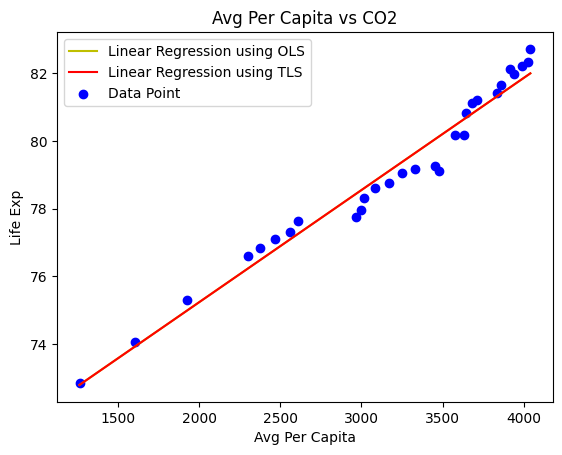

In [41]:
#plotting values 

x_max = np.max(data['Avg Per Capita']) + 5
x_min = np.min(data['Avg Per Capita']) - 5

#calculating line values of x and y

x = np.linspace(x_min, x_max, 1000)
y_OLS = b_OLS + a_OLS * x
y_TLS = b_TLS + a_TLS * x

#plotting line 

plt.plot(x, y_OLS, color='y', label='Linear Regression using OLS')
plt.plot(x, y_TLS, color='r', label='Linear Regression using TLS')
plt.scatter(data['Avg Per Capita'], data['Life Exp'], color='b', label='Data Point')
plt.xlabel('Avg Per Capita')
plt.ylabel('Life Exp')
plt.title('Avg Per Capita vs CO2' )
plt.legend()
plt.show()

In [43]:
# add five years to max value

max_val=np.max(data['Life Exp'])
print('Required Life expectency:',max_val+5)

print('--------IOLS-------')
a_IOLS,b_IOLS=getOLS(data,'Life Exp','Avg Per Capita')

Required Life expectency: 87.719512195122
--------IOLS-------
Syu: 1814.7775364934319 Suu: 6.2047615052757985
Slope Parameter of OLS: 292.481433001149
Offset Parameter of OLS: -19969.019004981375


## Estimation of per capita expenditure

In [44]:
max_life_Exp=max_val+5
max_per_capita_OLS= (max_life_Exp-b_OLS)/a_OLS
max_per_capita_IOLS= b_IOLS + a_IOLS * max_life_Exp
print('Incresed per capita expenditure from OLS:',max_per_capita_OLS)
print('Incresed per capita expenditure from IOLS:',max_per_capita_IOLS)

Incresed per capita expenditure from OLS: 5767.924851066101
Incresed per capita expenditure from IOLS: 5687.309624009671


In [50]:
max(data['Avg Per Capita'])

4035.9507

In [54]:
print('additional per capita amount required from OLS:',-max(data['Avg Per Capita'])+max_per_capita_OLS)
print('additional per capita amount required from IOLS:',-max(data['Avg Per Capita'])+max_per_capita_IOLS)
print('Average is',(-2*max(data['Avg Per Capita'])+max_per_capita_OLS+max_per_capita_IOLS)/2)

additional per capita amount required from OLS: 1731.974151066101
additional per capita amount required from IOLS: 1651.3589240096712
Average is 1691.6665375378861


# part (f)

In [64]:
df = {'Life Exp': 70,'Avg Per Capita':1000}
data_new = data.append(df, ignore_index = True)
data_new

,Life Exp,Avg Per Capita
0,72.853659,1267.5022
1,74.051220,1604.7333
2,75.300000,1923.1369
3,76.600000,2300.8976
4,76.848780,2377.8353
5,77.100000,2469.4117
6,77.300000,2561.9933
7,77.648780,2607.9071
8,77.751220,2965.8229
9,77.953659,2997.7557


In [65]:
print('------Avg Per Capita Expenditure vs Life Expectency-------')
# OLS
print('OLS')
a_OLS,b_OLS=getOLS(data_new,'Avg Per Capita','Life Exp')

------Avg Per Capita Expenditure vs Life Expectency-------
OLS
Syu: 2387.6116211322505 Suu: 680198.4220937073
Slope Parameter of OLS: 0.003510169302926319
Offset Parameter of OLS: 67.93632463837439


# part (g)

In [95]:
print('------Avg Per Capita Expenditure vs Life Expectency-------')
# OLS
print('OLS')
a_OLS,b_OLS=getOLS(data,'Avg Per Capita','Life Exp')

# print('------Avg Per Capita Expenditure vs Life Expectency-------')
# TLS
print('TLS')
a_TLS,b_TLS=getTLS(data,'Avg Per Capita','Life Exp')

print('upper and lower bounds are:',max(a_OLS,a_TLS),min(a_OLS,a_TLS))

------Avg Per Capita Expenditure vs Life Expectency-------
OLS
Syu: 1814.7775364934319 Suu: 547738.0526815183
Slope Parameter of OLS: 0.0033132215802954856
Offset Parameter of OLS: 68.60909910504716
TLS
Syu 1814.7775364934319 Suu 547738.0526815183 Syy 6.2047615052757985
Slope Parameter of TLS: 0.0033132227416671654
Offset Parameter of TLS: 68.60909543192504
upper and lower bounds are: 0.0033132227416671654 0.0033132215802954856


# part (h)

In [72]:
def estimate(x):
    return a_OLS*x+b_OLS

In [75]:
data['estimate']=data['Avg Per Capita'].apply(estimate)
data['error']=np.subtract(data['Life Exp'],data['estimate'])

In [78]:
print('Standard deviationof errors is',data['error'].std())

Standard deviationof errors is 0.46996092217241814


# part (i)

In [79]:
x_mean=np.mean(data['Avg Per Capita'])
Suu= np.multiply(np.subtract(data['Avg Per Capita'],x_mean),np.subtract(data['Avg Per Capita'],x_mean))
Suu=np.sum(Suu)/len(data)

sum_er_OLS=np.sum(np.power(np.subtract(data['Life Exp'],np.add(np.multiply(a_OLS,data['Avg Per Capita']),b_OLS)),2))
sigma_ep_OLS=sqrt(sum_er_OLS/(len(data)-2)) # variance of errors
sigma_a_OLS=sqrt(sigma_ep_OLS/len(data)*Suu) # variance of a

print(sigma_a_OLS,a_OLS)
a_OLS_min=a_OLS-2.16*sigma_a_OLS
a_OLS_max=a_OLS+2.16*sigma_a_OLS
print('95% CI for a_OLS is [',a_OLS_min,',',a_OLS_max,']')

95.35122532242947 0.003510169302926319
95% CI for a_OLS is [ -205.95513652714473 , 205.9621568657506 ]
